# Flask ÏõπÏóêÏÑú ÏûêÎèô ÏàòÏßë ‚Üí Ï†ÑÏ≤òÎ¶¨ ‚Üí ÌïôÏäµ ‚Üí ÏãúÍ∞ÅÌôîÍπåÏßÄ ÏûêÎèôÌôî
```
Ï†ÑÏ≤¥ Íµ¨Ï°∞ ÌùêÎ¶Ñ (ÌååÏù¥ÌîÑÎùºÏù∏)
csharp
Î≥µÏÇ¨
Ìé∏Ïßë
[1] API ÏûêÎèô ÏàòÏßë (1ÏãúÍ∞ÑÎßàÎã§)
     ‚Üì
[2] CSV Ï†ÄÏû• (Í∞±Ïã†)
     ‚Üì
[3] Ï†ÑÏ≤òÎ¶¨ (Ïû•Îßà/Í±¥Í∏∞ Î∂ÑÎ¶¨ + Í≤∞Ï∏° Ï†úÍ±∞ Îì±)
     ‚Üì
[4] Î™®Îç∏ ÌõàÎ†® (Î∂ÑÎ•ò/ÌöåÍ∑Ä Îì±)
     ‚Üì
[5] ÏòàÏ∏°/ÏãúÍ∞ÅÌôî Í≤∞Í≥º ÏÉùÏÑ±
     ‚Üì
[6] Flask ÏõπÏóê Î∞òÏòÅ (Ïòà: ÏÑúÏö∏ 25Í∞úÍµ¨ Ïπ®Ïàò ÏúÑÌóò Îì±)


--------------------------------------------------------------

Íµ¨ÌòÑ Î∞©Ïãù ÏöîÏïΩ
Îã®Í≥Ñ	Íµ¨ÌòÑ Ïòà	ÏûêÎèôÌôî Î∞©Î≤ï
1. Îç∞Ïù¥ÌÑ∞ ÏàòÏßë	schedule or cron	1ÏãúÍ∞ÑÎßàÎã§ APIÎ°ú ÏûêÎèô ÏàòÏßë (asos_collector.py)
2. Ï†ÑÏ≤òÎ¶¨	pandas Ïä§ÌÅ¨Î¶ΩÌä∏ Ìï®ÏàòÌôî	ÏàòÏßë ÏßÅÌõÑ rainy.csv, dry.csv ÏûêÎèô ÏÉùÏÑ±
3. ÌïôÏäµ/Î™®Îç∏ Ï†ÄÏû•	scikit-learn, joblib	ÏàòÏßë + Ï†ÑÏ≤òÎ¶¨ ÎÅùÎÇòÎ©¥ ÏûêÎèô ÌõàÎ†® ÌõÑ .pkl Ï†ÄÏû•
4. ÏãúÍ∞ÅÌôî	matplotlib, plotly, seaborn, folium Îì±	Î™®Îç∏ ÏÑ±Îä•, ÏúÑÌóò ÏßÄÎèÑ, Ï∂îÏÑ∏ Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
5. Flask Ïó∞Í≤∞	/api/update, /api/predict Îì±	ÏÇ¨Ïö©Ïûê ÏöîÏ≤≠ Ïãú ÏµúÏã† Î™®Îç∏ Í≤∞Í≥º Ï†úÍ≥µ

--------------------------------------------------------------

FlaskÏóêÏÑú Íµ¨ÏÑ±Ìï† Ïàò ÏûàÎäî Ï£ºÏöî API Ïòà
Í≤ΩÎ°ú	Í∏∞Îä•
/api/auto_update	üîÅ ÏàòÏßë + Ï†ÑÏ≤òÎ¶¨ + Î™®Îç∏ ÌïôÏäµ ÏûêÎèô Ïã§Ìñâ
/api/visualize	üìä ÏÑ±Îä•/Ïπ®Ïàò ÏúÑÌóò ÏßÄÎèÑ Îì± JSON or Ïù¥ÎØ∏ÏßÄ Î∞òÌôò
/api/predict	üåß ÌäπÏ†ï ÎÇ†Ïßú/ÏãúÍ∞ÑÏóê Ïπ®Ïàò ÏúÑÌóò ÏòàÏ∏° Î∞òÌôò
/dashboard	üñ• Ïõπ UI ÌéòÏù¥ÏßÄ (ÏãúÍ∞ÅÌôî Ìè¨Ìï®)


Î∞±ÏóîÎìú ÏûêÎèôÌôî ÌùêÎ¶Ñ (ÏòàÏãú)
python
Î≥µÏÇ¨
Ìé∏Ïßë
@app.route('/api/auto_update', methods=['POST'])
def auto_update():
    # 1. ÏàòÏßë
    job()  # asos_collector.pyÏóê ÏûàÎäî ÏàòÏßë Ìï®Ïàò

    # 2. Ï†ÑÏ≤òÎ¶¨
    preprocess_data()  # rainy.csv, dry.csv ÏÉùÏÑ±

    # 3. Î™®Îç∏ ÌõàÎ†®
    model = train_model('rainy.csv')  # Ïòà: RandomForestClassifier
    joblib.dump(model, 'rainy_model.pkl')

    # 4. ÏãúÍ∞ÅÌôî
    generate_performance_plot(model)
    generate_flood_risk_map()

    return jsonify({'status': 'ÏôÑÎ£å', 'message': 'Î™®Îì† Îã®Í≥Ñ ÏûêÎèô Ïã§Ìñâ ÏôÑÎ£å'})
    
-----------------------------------------------------------------------------------

Í∞ÄÎä• ÏãúÍ∞ÅÌôî Ïòà
ÏãúÍ∞ÅÌôî Ï¢ÖÎ•ò	ÎùºÏù¥Î∏åÎü¨Î¶¨
Ïπ®Ïàò ÏúÑÌóò ÏßÄÎèÑ	folium, plotly, seaborn, matplotlib
Î™®Îç∏ ÏÑ±Îä• Í∑∏ÎûòÌîÑ	matplotlib, seaborn
ÏãúÍ∞ÑÎ≥Ñ Í∞ïÏàòÎüâ Í∑∏ÎûòÌîÑ	plotly interactive
Î™®Îç∏ ÎπÑÍµê ÎßâÎåÄÏ∞®Ìä∏	/api/model_compareÎ°ú Íµ¨ÌòÑ Í∞ÄÎä•
    
ÌïÑÏöîÌïú ÏöîÏÜåÎì§
Í∏∞Ïà† ÏöîÏÜå	ÏÑ§Î™Ö
Flask	Î∞±ÏóîÎìú ÏÑúÎ≤Ñ
joblib or pickle	Î™®Îç∏ Ï†ÄÏû• Î∞è Ïû¨ÏÇ¨Ïö©
schedule, threading, APScheduler	Î∞±Í∑∏ÎùºÏö¥Îìú ÏûêÎèô Ïä§ÏºÄÏ§ÑÎßÅ
matplotlib, plotly, folium	ÏãúÍ∞ÅÌôî
pandas, scikit-learn	Ï†ÑÏ≤òÎ¶¨ Î∞è Î™®Îç∏ ÌõàÎ†®

------------------------------------------------------------------------------------

ÏµúÏ¢Ö Î™©Ìëú: ‚ÄúÏûêÎèô Ïπ®Ïàò ÏòàÏ∏° Ïõπ ÏãúÏä§ÌÖú‚Äù
ÏÑúÏö∏ 25Í∞úÍµ¨ Ïã§ÏãúÍ∞Ñ ÏúÑÌóò ÏòàÏ∏°

ÏßÄÎèÑ Í∏∞Î∞ò ÏãúÍ∞ÅÌôî + Î†àÎ≤® ÌëúÏãú

ÏûêÎèô ÌïôÏäµ Î∞è ÏóÖÎç∞Ïù¥Ìä∏

Î™®Îç∏ ÏÑ±Îä• Î™®ÎãàÌÑ∞ÎßÅ ÎåÄÏãúÎ≥¥Îìú

```

In [1]:
pip install requests pandas schedule

Note: you may need to restart the kernel to use updated packages.


# api key ÌôúÏö© Î∞è Îç∞Ïù¥ÌÑ∞ ÏàòÏßë

In [2]:
import os
from dotenv import load_dotenv
OPENWEATHER_API_KEY = load_dotenv('.env')
OPENWEATHER_API_KEY = os.getenv('OPENWEATHER_API_KEY')
# print(os.getenv('OPENWEATHER_API_KEY'))

# ASOS ÏãúÍ∞ÑÎ≥Ñ ÏûêÎ£å ÏàòÏßë

In [5]:
import os
import time
import requests
import pandas as pd
import datetime
import schedule

#  ÏÇ¨Ïö©Ïûê ÏÑ§Ï†ï
SERVICE_KEY = OPENWEATHER_API_KEY
CSV_FILE = 'asos_seoul_hourly.csv'
STN_ID = 108
NUM_OF_ROWS = 800
API_URL = "http://apis.data.go.kr/1360000/AsosHourlyInfoService/getWthrDataList"

START_DATE = datetime.date(2020, 7, 10)
END_DATE = datetime.date.today() - datetime.timedelta(days=1)

def load_existing_times():
    if not os.path.exists(CSV_FILE):
        return set()
    df = pd.read_csv(CSV_FILE)
    return set(df['tm'].astype(str))

def fetch_day_data(date_obj, existing_times):
    """ÏßÄÏ†ïÎêú ÌïòÎ£®Ïπò(00~23Ïãú) Îç∞Ïù¥ÌÑ∞Î•º ÏàòÏßë"""
    all_results = []
    start_dt = datetime.datetime.combine(date_obj, datetime.time(0, 0))
    end_dt = datetime.datetime.combine(date_obj, datetime.time(23, 0))

    page = 1
    while True:
        params = {
            'serviceKey': SERVICE_KEY,
            'numOfRows': NUM_OF_ROWS,
            'pageNo': page,
            'dataCd': 'ASOS',
            'dateCd': 'HR',
            'startDt': start_dt.strftime("%Y%m%d"),
            'startHh': "00",
            'endDt': end_dt.strftime("%Y%m%d"),
            'endHh': "23",
            'stnIds': STN_ID,
            'dataType': 'JSON'
        }

        try:
            response = requests.get(API_URL, params=params, timeout=60)
            response.raise_for_status()
        except requests.exceptions.RequestException as e:
            print(f" [{date_obj}] ÏöîÏ≤≠ Ïã§Ìå®: {e}")
            return []

        try:
            data = response.json()
            result_code = data['response']['header']['resultCode']
            result_msg = data['response']['header']['resultMsg']
            if result_code != '00':
                print(f" [{date_obj}] API Ïò§Î•ò: {result_msg}")
                return []
        except Exception as e:
            print(f" [{date_obj}] JSON ÌååÏã± Ïã§Ìå®")
            print(response.text[:300])
            return []

        items = data['response']['body']['items'].get('item', [])
        if not items:
            break

        for item in items:
            if item['tm'] not in existing_times:
                all_results.append(item)

        if len(items) < NUM_OF_ROWS:
            break
        page += 1

    print(f" [{date_obj}] {len(all_results)}Í±¥ ÏàòÏßë ÏÑ±Í≥µ")
    return all_results

def append_to_csv(new_data):
    if not new_data:
        return
    df = pd.DataFrame(new_data)
    write_header = not os.path.exists(CSV_FILE)
    df.to_csv(CSV_FILE, mode='a', header=write_header, index=False)

def get_last_collected_date():
    if not os.path.exists(CSV_FILE):
        return START_DATE
    df = pd.read_csv(CSV_FILE)
    last_time = pd.to_datetime(df['tm']).max()
    return last_time.date() + datetime.timedelta(days=1)

def job():
    existing_times = load_existing_times()
    current_date = get_last_collected_date()

    while current_date <= END_DATE:
        new_data = fetch_day_data(current_date, existing_times)
        append_to_csv(new_data)
        current_date += datetime.timedelta(days=1)
        time.sleep(0.5)  # Í≥ºÎèÑÌïú ÏöîÏ≤≠ Î∞©ÏßÄ

# ÏµúÏ¥à Ïã§Ìñâ
job()

# Îß§ÏãúÍ∞ÑÎßàÎã§ Ïã§ÌñâÎêòÎèÑÎ°ù ÏÑ§Ï†ï
schedule.every(1).hours.do(job)

print(" ÏûêÎèô ÏàòÏßë ÎåÄÍ∏∞ Ï§ë...")
while True:
    schedule.run_pending()
    time.sleep(60)

 [2020-07-10] JSON ÌååÏã± Ïã§Ìå®
<OpenAPI_ServiceResponse>
	<cmmMsgHeader>
		<errMsg>SERVICE ERROR</errMsg>
		<returnAuthMsg>SERVICE_KEY_IS_NOT_REGISTERED_ERROR</returnAuthMsg>
		<returnReasonCode>30</returnReasonCode>
	</cmmMsgHeader>
</OpenAPI_ServiceResponse>
 [2020-07-11] JSON ÌååÏã± Ïã§Ìå®
<OpenAPI_ServiceResponse>
	<cmmMsgHeader>
		<errMsg>SERVICE ERROR</errMsg>
		<returnAuthMsg>SERVICE_KEY_IS_NOT_REGISTERED_ERROR</returnAuthMsg>
		<returnReasonCode>30</returnReasonCode>
	</cmmMsgHeader>
</OpenAPI_ServiceResponse>
 [2020-07-12] JSON ÌååÏã± Ïã§Ìå®
<OpenAPI_ServiceResponse>
	<cmmMsgHeader>
		<errMsg>SERVICE ERROR</errMsg>
		<returnAuthMsg>SERVICE_KEY_IS_NOT_REGISTERED_ERROR</returnAuthMsg>
		<returnReasonCode>30</returnReasonCode>
	</cmmMsgHeader>
</OpenAPI_ServiceResponse>
 [2020-07-13] JSON ÌååÏã± Ïã§Ìå®
<OpenAPI_ServiceResponse>
	<cmmMsgHeader>
		<errMsg>SERVICE ERROR</errMsg>
		<returnAuthMsg>SERVICE_KEY_IS_NOT_REGISTERED_ERROR</returnAuthMsg>
		<returnReasonCode>30</returnReas

KeyboardInterrupt: 

‚úÖ [2024-02-06] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-02-07] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-02-08] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-02-09] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-02-10] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-02-11] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-02-12] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-02-13] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-02-14] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-02-15] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-02-16] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-02-17] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-02-18] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-02-19] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-02-20] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-02-21] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-02-22] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-02-23] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-02-24] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-02-25] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-02-26] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-02-27] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-02-28] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-02-29] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-03-01] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-03-02] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-03-03] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚

‚úÖ [2024-12-22] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-12-23] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-12-24] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-12-25] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-12-26] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-12-27] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-12-28] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-12-29] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-12-30] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2024-12-31] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2025-01-01] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2025-01-02] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2025-01-03] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2025-01-04] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2025-01-05] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2025-01-06] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2025-01-07] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2025-01-08] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2025-01-09] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2025-01-10] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2025-01-11] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2025-01-12] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2025-01-13] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2025-01-14] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2025-01-15] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2025-01-16] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚úÖ [2025-01-17] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
‚

KeyboardInterrupt: 

# ÏúÑ Îç∞Ïù¥ÌÑ∞ ÏàòÏßë ÏΩîÎìú ÏÑ§Î™Ö

In [ ]:
'''
ÌïµÏã¨ ÏöîÏïΩ
Í∏∞Îä•	ÏÑ§Î™Ö
.envÏóêÏÑú API ÌÇ§ Î∂àÎü¨Ïò§Í∏∞	Ïô∏Î∂ÄÏóê ÎÖ∏Ï∂úÎêòÏßÄ ÏïäÎèÑÎ°ù Î≥¥Ïïà Ï≤òÎ¶¨
ÌïòÎ£® Îã®ÏúÑÎ°ú Î∞òÎ≥µ ÏàòÏßë	ÏãúÍ∞ÑÎ≥Ñ Îç∞Ïù¥ÌÑ∞ 24Í±¥Ïî© ÏàòÏßë
Ïù¥ÎØ∏ ÏàòÏßëÎêú Îç∞Ïù¥ÌÑ∞Îäî Í±¥ÎÑàÎúÄ	Ï§ëÎ≥µ Ï†ÄÏû• Î∞©ÏßÄ
API Ïò§Î•ò/Ïã§Ìå®Îäî Î°úÍ∑∏Î°ú Ï∂úÎ†• ÌõÑ Î¨¥Ïãú	Ï†ÑÏ≤¥ ÌùêÎ¶Ñ ÎÅäÍ∏∞ÏßÄ ÏïäÍ≤å ÏÑ§Í≥Ñ
scheduleÎ°ú 1ÏãúÍ∞ÑÎßàÎã§ ÏûêÎèô Ïã§Ìñâ	Ïã§ÏãúÍ∞Ñ Ïö¥ÏòÅ Í∞ÄÎä•

------------------------------------------------------------------

# ÌïÑÏàò ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
import os
import time
import requests
import pandas as pd
import datetime
import schedule
from dotenv import load_dotenv

# .env ÌååÏùºÏóêÏÑú ÌôòÍ≤ΩÎ≥ÄÏàò(OPENWEATHER_API_KEY) Î°úÎìú
OPENWEATHER_API_KEY = load_dotenv('.env')
OPENWEATHER_API_KEY = os.getenv('OPENWEATHER_API_KEY')

#  ÏÇ¨Ïö©Ïûê ÏÑ§Ï†ï
SERVICE_KEY = OPENWEATHER_API_KEY  # Í≥µÍ≥µÎç∞Ïù¥ÌÑ∞Ìè¨ÌÑ∏ÏóêÏÑú Î∞úÍ∏âÎ∞õÏùÄ API ÌÇ§
CSV_FILE = 'asos_seoul_hourly.csv'  # ÏàòÏßëÎêú Îç∞Ïù¥ÌÑ∞Î•º Ï†ÄÏû•Ìï† CSV ÌååÏùºÎ™Ö
STN_ID = 108  # ÏÑúÏö∏ ÏßÄÏó≠Ïùò ÏßÄÏ†ê ÏΩîÎìú
NUM_OF_ROWS = 800  # Ìïú ÌéòÏù¥ÏßÄÎãπ ÏàòÏßëÌï† Îç∞Ïù¥ÌÑ∞ Í∞úÏàò (ÏµúÎåÄ 1000ÍπåÏßÄ Í∞ÄÎä•)
API_URL = "http://apis.data.go.kr/1360000/AsosHourlyInfoService/getWthrDataList"  # Í∏∞ÏÉÅÏ≤≠ ASOS API URL

# ÏàòÏßë Í∏∞Í∞Ñ ÏÑ§Ï†ï
START_DATE = datetime.date(2020, 7, 10)
END_DATE = datetime.date(2025, 7, 9)

#  Í∏∞Ï°¥ CSVÏóêÏÑú Ïù¥ÎØ∏ ÏàòÏßëÎêú ÏãúÍ∞Ñ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
def load_existing_times():
    if not os.path.exists(CSV_FILE):
        return set()  # ÌååÏùºÏù¥ ÏóÜÏúºÎ©¥ Îπà set Î∞òÌôò
    df = pd.read_csv(CSV_FILE)
    return set(df['tm'].astype(str))  # 'tm' Ïª¨Îüº Í∞íÏùÑ Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôòÌï¥ setÏúºÎ°ú Î∞òÌôò

#  ÌïòÎ£®Ïπò Îç∞Ïù¥ÌÑ∞(00~23Ïãú) ÏàòÏßë Ìï®Ïàò
def fetch_day_data(date_obj, existing_times):
    all_results = []  # ÏµúÏ¢Ö ÏàòÏßëÎêú item Ï†ÄÏû• Î¶¨Ïä§Ìä∏
    start_dt = datetime.datetime.combine(date_obj, datetime.time(0, 0))  # ÏãúÏûë ÏãúÍ∞Å: ÏûêÏ†ï
    end_dt = datetime.datetime.combine(date_obj, datetime.time(23, 0))  # Ï¢ÖÎ£å ÏãúÍ∞Å: Ïò§ÌõÑ 11Ïãú

    page = 1  # ÌéòÏù¥ÏßÄÎÑ§Ïù¥ÏÖò ÏãúÏûë
    while True:
        # API ÏöîÏ≤≠ ÌååÎùºÎØ∏ÌÑ∞ Íµ¨ÏÑ±
        params = {
            'serviceKey': SERVICE_KEY,
            'numOfRows': NUM_OF_ROWS,
            'pageNo': page,
            'dataCd': 'ASOS',
            'dateCd': 'HR',
            'startDt': start_dt.strftime("%Y%m%d"),
            'startHh': "00",
            'endDt': end_dt.strftime("%Y%m%d"),
            'endHh': "23",
            'stnIds': STN_ID,
            'dataType': 'JSON'
        }

        try:
            response = requests.get(API_URL, params=params, timeout=60)  # 60Ï¥à ÌÉÄÏûÑÏïÑÏõÉ ÏÑ§Ï†ï
            response.raise_for_status()  # HTTP Ïò§Î•ò Î∞úÏÉù Ïãú ÏòàÏô∏ Î∞úÏÉù
        except requests.exceptions.RequestException as e:
            print(f" [{date_obj}] ÏöîÏ≤≠ Ïã§Ìå®: {e}")
            return []  # Ïã§Ìå®Ìïú Í≤ΩÏö∞ Îπà Î¶¨Ïä§Ìä∏ Î∞òÌôòÌïòÏó¨ Í±¥ÎÑàÎúÄ

        try:
            data = response.json()  # JSON ÏùëÎãµ ÌååÏã±
            result_code = data['response']['header']['resultCode']
            result_msg = data['response']['header']['resultMsg']
            if result_code != '00':
                print(f" [{date_obj}] API Ïò§Î•ò: {result_msg}")
                return []  # API ÏùëÎãµÏù¥ Ï†ïÏÉÅ ÏΩîÎìúÍ∞Ä ÏïÑÎãå Í≤ΩÏö∞ Î¨¥Ïãú
        except Exception as e:
            print(f" [{date_obj}] JSON ÌååÏã± Ïã§Ìå®")
            print(response.text[:300])  # ÏóêÎü¨ ÏùëÎãµ ÏùºÎ∂Ä Ï∂úÎ†•
            return []

        items = data['response']['body']['items'].get('item', [])  # Ïã§Ï†ú Í¥ÄÏ∏° Îç∞Ïù¥ÌÑ∞ Î¶¨Ïä§Ìä∏
        if not items:
            break  # Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏúºÎ©¥ Ï¢ÖÎ£å

        # Í∏∞Ï°¥Ïóê ÏàòÏßëÎêòÏßÄ ÏïäÏùÄ ÏãúÍ∞ÑÎßå ÌïÑÌÑ∞ÎßÅ
        for item in items:
            if item['tm'] not in existing_times:
                all_results.append(item)

        if len(items) < NUM_OF_ROWS:
            break  # Îçî Ïù¥ÏÉÅ Îã§Ïùå ÌéòÏù¥ÏßÄÍ∞Ä ÏóÜÏúºÎ©¥ Ï¢ÖÎ£å
        page += 1  # Îã§Ïùå ÌéòÏù¥ÏßÄ ÏöîÏ≤≠

    print(f" [{date_obj}] {len(all_results)}Í±¥ ÏàòÏßë ÏÑ±Í≥µ")
    return all_results

#  ÏÉàÎ°ú ÏàòÏßëÎêú Îç∞Ïù¥ÌÑ∞Î•º CSVÏóê Ï†ÄÏû•
def append_to_csv(new_data):
    if not new_data:
        return
    df = pd.DataFrame(new_data)
    write_header = not os.path.exists(CSV_FILE)  # Ìó§ÎçîÎäî ÏµúÏ¥à 1ÌöåÎßå Í∏∞Î°ù
    df.to_csv(CSV_FILE, mode='a', header=write_header, index=False)

#  CSVÏóêÏÑú ÎßàÏßÄÎßâ ÏàòÏßë ÎÇ†ÏßúÎ•º ÌôïÏù∏ÌïòÏó¨ Ïù¥Ïñ¥ÏÑú ÏàòÏßë
def get_last_collected_date():
    if not os.path.exists(CSV_FILE):
        return START_DATE  # ÌååÏùºÏù¥ ÏóÜÏúºÎ©¥ START_DATEÎ∂ÄÌÑ∞ ÏãúÏûë
    df = pd.read_csv(CSV_FILE)
    last_time = pd.to_datetime(df['tm']).max()  # Í∞ÄÏû• ÎßàÏßÄÎßâ Í¥ÄÏ∏° ÏãúÍ∞Å
    return last_time.date() + datetime.timedelta(days=1)  # Îã§Ïùå ÎÇ†Î∂ÄÌÑ∞ ÏàòÏßë

#  ÏûêÎèô ÏàòÏßë ÏûëÏóÖ Ï†ïÏùò
def job():
    existing_times = load_existing_times()  # Í∏∞Ï°¥ ÏàòÏßë ÏãúÍ∞Ñ Î™©Î°ù
    current_date = get_last_collected_date()  # Îã§Ïùå ÏàòÏßë ÏãúÏûë ÎÇ†Ïßú

    while current_date <= END_DATE:
        new_data = fetch_day_data(current_date, existing_times)  # ÌïòÎ£®Ïπò ÏàòÏßë
        append_to_csv(new_data)  # CSVÏóê Ï†ÄÏû•
        current_date += datetime.timedelta(days=1)  # Îã§Ïùå ÎÇ†ÏßúÎ°ú Ïù¥Îèô
        time.sleep(0.5)  # ÎÑàÎ¨¥ Îπ†Î•∏ ÏöîÏ≤≠ Î∞©ÏßÄ (0.5Ï¥à ÎåÄÍ∏∞)

#  ÏµúÏ¥à ÏàòÏßë Ïã§Ìñâ
job()

#  Îß§ ÏãúÍ∞ÑÎßàÎã§ job()ÏùÑ ÏûêÎèô Ïã§Ìñâ
schedule.every(1).hours.do(job)

#  Î¨¥Ìïú Î£®ÌîÑ: Ïä§ÏºÄÏ§ÑÎßÅÎêú ÏûëÏóÖ ÏàòÌñâ ÎåÄÍ∏∞
print(" ÏûêÎèô ÏàòÏßë ÎåÄÍ∏∞ Ï§ë...")
while True:
    schedule.run_pending()  # ÏòàÏïΩÎêú ÏûëÏóÖ Ïã§Ìñâ
    time.sleep(60)  # 1Î∂Ñ Îã®ÏúÑÎ°ú Ï≤¥ÌÅ¨
'''

In [ ]:
'''
Í∏∞ÏÉÅÏ≤≠ ASOS APIÎäî ÏßÄÏ†êÎßàÎã§ Í≥ºÍ±∞ ÏàòÏßë Í∞ÄÎä• Î≤îÏúÑÍ∞Ä Îã§Î¶Ñ

ÏÑúÏö∏(ÏßÄÏ†ê 108)ÏùÄ 2000ÎÖÑÎåÄ Ïù¥ÌõÑ ÎåÄÎ∂ÄÎ∂Ñ Ïª§Î≤Ñ Í∞ÄÎä•

ÌôïÏù∏Îêú Ïòà: 2000-01-01 ~ ÌòÑÏû¨ÍπåÏßÄ ÏàòÏßë Í∞ÄÎä•Ìï®
‚Üí ÏßÅÏ†ë startDt=20000101Î°ú Ï°∞ÌöåÌï¥Î≥¥Î©¥ Ï†ïÏÉÅ ÏùëÎãµ ÌôïÏù∏ Í∞ÄÎä•
'''

# Ï†ÑÏ≤òÎ¶¨ 
## Í∞Å ÌååÏùºÏùÄ Î®∏Ïã†Îü¨Îãù Î™®Îç∏Ïóê ÏßÅÏ†ë ÌïôÏäµÏãúÌÇ¨ Ïàò ÏûàÏùÑ Ï†ïÎèÑÎ°ú Ï†ïÏ†úÎêú ÏÉÅÌÉú(Í∏∞ÏÉÅÏ≤≠ data)

In [ ]:
import pandas as pd

# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv('asos_seoul_hourly.csv')

# 2. ÎÇ†Ïßú ÌååÏã±
df['tm'] = pd.to_datetime(df['tm'], errors='coerce')
df['year'] = df['tm'].dt.year
df['month'] = df['tm'].dt.month
df['day'] = df['tm'].dt.day
df['hour'] = df['tm'].dt.hour

# 3. Ïó¥ ÏÑ†ÌÉù (Î™®Îç∏ ÏûÖÎ†•Ïö© Ï£ºÏöî ÌäπÏÑ±)
features = ['tm', 'ta', 'rn', 'ws', 'wd', 'hm', 'pa']
df = df[features].dropna()

# 4. Ïû•ÎßàÏ≤† / Í±¥Ï°∞Í∏∞ Î∂ÑÎ¶¨
RAINY_MONTHS = [6, 7, 8]
DRY_MONTHS = [12, 1, 2]

rainy_df = df[df['tm'].dt.month.isin(RAINY_MONTHS)].copy()
dry_df = df[df['tm'].dt.month.isin(DRY_MONTHS)].copy()

# 5. Ï†ÄÏû•
rainy_df.to_csv('rainy.csv', index=False)
dry_df.to_csv('dry.csv', index=False)

print(f" Ïû•ÎßàÏ≤† Îç∞Ïù¥ÌÑ∞: {len(rainy_df)}Ìñâ Ï†ÄÏû• ÏôÑÎ£å (rainy.csv)")
print(f" Í±¥Ï°∞Í∏∞ Îç∞Ïù¥ÌÑ∞: {len(dry_df)}Ìñâ Ï†ÄÏû• ÏôÑÎ£å (dry.csv)")


In [ ]:
'''
rn > 0Îßå ÏûàÎäî Ïû•ÎßàÏ≤† Í∞ïÏàò ÏßëÏ§ë ÏãúÍ∏∞Îßå Ï∂îÏ∂úÎèÑ Í∞ÄÎä•

feature scaling, label Ï∂îÍ∞ÄÍπåÏßÄÎèÑ Í∞ÄÎä•

Í≥ÑÏ†àÎ≥Ñ Î™®Îç∏ Î∂ÑÍ∏∞ ÌõàÎ†®ÎèÑ Í∞ÄÎä•

Ïù¥ÏÉÅÏπò Ï†úÍ±∞ or Ï†ïÍ∑úÌôî (StandardScaler, MinMaxScaler)

Í∞ïÏàòÎüâ Í∏∞Ï§Ä Ïù¥ÏßÑ Î∂ÑÎ•ò Î†àÏù¥Î∏î ÏÉùÏÑ± (flood = 1 if rn > threshold else 0)

Ïû•ÎßàÏ≤† Ï†ÑÏö© Î™®Îç∏ vs Í±¥Ï°∞Í∏∞ Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê

-----------------------------------------------------------------------------

Îã§Ïùå Ï∂îÏ≤ú Ïä§ÌÖù
preprocess_data() Ìï®ÏàòÌôî ‚Üí FlaskÏóê Ïó∞Í≤∞

train_model() Ìï®ÏàòÎ°ú ÏûêÎèô ÌïôÏäµ Í∞ÄÎä•ÌïòÎèÑÎ°ù ÎßåÎì§Í∏∞

/api/auto_update APIÎ∂ÄÌÑ∞ ÎßåÎì§Ïñ¥Î≥¥Ïûê



'''

# 2000ÎÖÑ 1Ïõî 10ÏùºÎ∂ÄÌÑ∞ ~ Ïò§ÎäòÍπåÏßÄ Îç∞Ïù¥ÌÑ∞ 
## Ïª¨ÎüºÏùÄ useful_columns = ['tm', 'ta', 'rn', 'ws', 'wd', 'hm', 'pa', 'ps', 'td', 'pv'] Ïù¥Í≤ÉÎßå

In [6]:
import os
import time
import requests
import pandas as pd
import datetime
import schedule
from dotenv import load_dotenv
OPENWEATHER_API_KEY = load_dotenv('.env')
OPENWEATHER_API_KEY = os.getenv('OPENWEATHER_API_KEY')


#  ÏÇ¨Ïö©Ïûê ÏÑ§Ï†ï
SERVICE_KEY = OPENWEATHER_API_KEY
CSV_FILE = 'asos_seoul_hourly.csv'
STN_ID = 108
NUM_OF_ROWS = 800
API_URL = "http://apis.data.go.kr/1360000/AsosHourlyInfoService/getWthrDataList"

START_DATE = datetime.date(2000, 1, 10)
END_DATE = datetime.date.today() - datetime.timedelta(days=1)

def load_existing_times():
    if not os.path.exists(CSV_FILE):
        return set()
    df = pd.read_csv(CSV_FILE)
    return set(df['tm'].astype(str))

def fetch_day_data(date_obj, existing_times):
    """ÏßÄÏ†ïÎêú ÌïòÎ£®Ïπò(00~23Ïãú) Îç∞Ïù¥ÌÑ∞Î•º ÏàòÏßë"""
    all_results = []
    start_dt = datetime.datetime.combine(date_obj, datetime.time(0, 0))
    end_dt = datetime.datetime.combine(date_obj, datetime.time(23, 0))

    page = 1
    while True:
        params = {
            'serviceKey': SERVICE_KEY,
            'numOfRows': NUM_OF_ROWS,
            'pageNo': page,
            'dataCd': 'ASOS',
            'dateCd': 'HR',
            'startDt': start_dt.strftime("%Y%m%d"),
            'startHh': "00",
            'endDt': end_dt.strftime("%Y%m%d"),
            'endHh': "23",
            'stnIds': STN_ID,
            'dataType': 'JSON'
        }

        try:
            response = requests.get(API_URL, params=params, timeout=60)
            response.raise_for_status()
        except requests.exceptions.RequestException as e:
            print(f" [{date_obj}] ÏöîÏ≤≠ Ïã§Ìå®: {e}")
            return []

        try:
            data = response.json()
            result_code = data['response']['header']['resultCode']
            result_msg = data['response']['header']['resultMsg']
            if result_code != '00':
                print(f" [{date_obj}] API Ïò§Î•ò: {result_msg}")
                return []
        except Exception as e:
            print(f" [{date_obj}] JSON ÌååÏã± Ïã§Ìå®")
            print(response.text[:300])
            return []

        items = data['response']['body']['items'].get('item', [])
        if not items:
            break

        for item in items:
            if item['tm'] not in existing_times:
                all_results.append(item)

        if len(items) < NUM_OF_ROWS:
            break
        page += 1

    print(f" [{date_obj}] {len(all_results)}Í±¥ ÏàòÏßë ÏÑ±Í≥µ")
    return all_results

def append_to_csv(new_data):
    if not new_data:
        return
    df = pd.DataFrame(new_data)

    useful_columns = ['tm', 'ta', 'rn', 'ws', 'wd', 'hm', 'pa', 'ps', 'td', 'pv']
    df = df[[col for col in useful_columns if col in df.columns]]
        
    write_header = not os.path.exists(CSV_FILE)
    df.to_csv(CSV_FILE, mode='a', header=write_header, index=False)

def get_last_collected_date():
    if not os.path.exists(CSV_FILE):
        return START_DATE
    df = pd.read_csv(CSV_FILE)
    last_time = pd.to_datetime(df['tm']).max()
    return last_time.date() + datetime.timedelta(days=1)

def job():
    existing_times = load_existing_times()
    current_date = get_last_collected_date()

    while current_date <= END_DATE:
        new_data = fetch_day_data(current_date, existing_times)
        append_to_csv(new_data)
        current_date += datetime.timedelta(days=1)
        time.sleep(0.5)  # Í≥ºÎèÑÌïú ÏöîÏ≤≠ Î∞©ÏßÄ

# ÏµúÏ¥à Ïã§Ìñâ
job()

# Îß§ÏãúÍ∞ÑÎßàÎã§ Ïã§ÌñâÎêòÎèÑÎ°ù ÏÑ§Ï†ï
schedule.every(1).hours.do(job)

print(" ÏûêÎèô ÏàòÏßë ÎåÄÍ∏∞ Ï§ë...")
while True:
    schedule.run_pending()
    time.sleep(60)


 [2025-07-13] 24Í±¥ ÏàòÏßë ÏÑ±Í≥µ
 ÏûêÎèô ÏàòÏßë ÎåÄÍ∏∞ Ï§ë...


KeyboardInterrupt: 

In [5]:
import pandas as pd

# CSV Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('asos_seoul_hourly.csv')

# tm Ïª¨ÎüºÏùÑ datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df['tm'] = pd.to_datetime(df['tm'])

# Ïõî Ï∂îÏ∂ú
df['month'] = df['tm'].dt.month

# Í≥ÑÏ†à Íµ¨Î∂Ñ Ìï®Ïàò
def assign_season(month):
    if month in [6, 7, 8]:
        return 'Ïû•ÎßàÍ∏∞'
    elif month in [12, 1, 2]:
        return 'Í±¥Ï°∞Í∏∞'
    else:
        return 'Í∏∞ÌÉÄ'

# Í≥ÑÏ†à ÎùºÎ≤® Ïª¨Îüº ÏÉùÏÑ±
df['season'] = df['month'].apply(assign_season)

# Ïõî Ïª¨ÎüºÏùÄ Î∂àÌïÑÏöîÌïòÎ©¥ Ï†úÍ±∞
df.drop(columns=['month'], inplace=True)

# Í≤∞Í≥º Ï†ÄÏû• (ÏÑ†ÌÉùÏÇ¨Ìï≠)
df.to_csv('asos_seoul_hourly_labeled.csv', index=False)

print(" season Ïª¨Îüº Ï∂îÍ∞Ä Î∞è Ï†ÄÏû• ÏôÑÎ£å")


 season Ïª¨Îüº Ï∂îÍ∞Ä Î∞è Ï†ÄÏû• ÏôÑÎ£å


# Í≤∞Ï∏°Ïπò ÌôïÏù∏

In [7]:
import pandas as pd

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('asos_seoul_hourly.csv')

# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞ ÌôïÏù∏
print(df.info())

# Í∞Å Ïª¨ÎüºÎ≥Ñ Í≤∞Ï∏°Ïπò Í∞úÏàò Ï∂úÎ†•
print("\n Í≤∞Ï∏°Ïπò Í∞úÏàò:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217967 entries, 0 to 217966
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   tm      217967 non-null  object 
 1   ta      217960 non-null  float64
 2   rn      22249 non-null   float64
 3   ws      217841 non-null  float64
 4   wd      217780 non-null  float64
 5   hm      217917 non-null  float64
 6   pa      169765 non-null  float64
 7   ps      169817 non-null  float64
 8   td      169812 non-null  float64
 9   pv      169830 non-null  float64
dtypes: float64(9), object(1)
memory usage: 16.6+ MB
None

 Í≤∞Ï∏°Ïπò Í∞úÏàò:
tm         0
ta         7
rn    195718
ws       126
wd       187
hm        50
pa     48202
ps     48150
td     48155
pv     48137
dtype: int64


# Í≤∞Ï∏°Ïπò Ï§ëÏúóÍ∞í(Í≥ÑÏÇ∞Ïóê ÏûòÎ™ªÎêú ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ† ÏúÑÌóòÏù¥ ÏûàÏúºÎØÄÎ°ú Ìå®Ïä§)

In [ ]:
# ÏõêÎ≥∏ Î≥µÏÇ¨
df_median = df.copy()

# ÏàòÏπòÌòï Ïª¨ÎüºÎßå ÏÑ†ÌÉù
numeric_cols = df_median.select_dtypes(include=['float64', 'int64']).columns

# Ï§ëÏúÑÍ∞íÏúºÎ°ú Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞
df_median[numeric_cols] = df_median[numeric_cols].fillna(df_median[numeric_cols].median())

# ÌôïÏù∏
print("\n Ï§ëÏúÑÍ∞íÏúºÎ°ú Ï±ÑÏö¥ ÌõÑ Í≤∞Ï∏°Ïπò Í∞úÏàò:")
print(df_median.isnull().sum())

# Ï†ÄÏû• (ÏÑ†ÌÉù)
# df_median.to_csv('asos_seoul_hourly_filled.csv', index=False)
# print(" asos_seoul_hourly_filled.csv Ï†ÄÏû• ÏôÑÎ£å")


# Í≤∞Ï∏°Ïπò dropna(Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïù¥ÎØÄÎ°ú Ìå®Ïä§)

In [ ]:
# # Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Ìñâ Ï†úÍ±∞
# df_dropna = df.dropna()

# # ÌôïÏù∏
# print("\n‚úÖ Í≤∞Ï∏°Ïπò Ï†úÍ±∞ ÌõÑ shape:", df_dropna.shape)
# print("‚úÖ ÎÇ®ÏùÄ Í≤∞Ï∏°Ïπò Í∞úÏàò:\n", df_dropna.isnull().sum())

# # Ï†ÄÏû• (ÏÑ†ÌÉù)
# df_dropna.to_csv('asos_seoul_hourly_dropped.csv', index=False)
# print("‚úÖ asos_seoul_hourly_dropped.csv Ï†ÄÏû• ÏôÑÎ£å")


# ÎπÑÍ∞Ä ÏïàÏò®ÎÇ†ÏùÄ nanÏù¥ÎØÄÎ°ú 0ÏúºÎ°ú ÎåÄÏ≤¥(fillna), ÎÇòÎ®∏ÏßÄÎäî Ï§ëÏúóÍ∞íÏúºÎ°ú ÎåÄÏ≤¥(Ï≤òÎ¶¨Ìï† Îç∞Ïù¥ÌÑ∞ Ïñë Ï†ÅÏùå)

In [8]:
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('asos_seoul_hourly.csv')

# rn: Í∞ïÏàòÎüâÏùÄ ÎπÑ Ïïà Ïò® Í±∏Î°ú Ï≤òÎ¶¨
df['rn'] = df['rn'].fillna(0)

# ÏàòÏπòÌòï Ï§ëÏúÑÍ∞í ÎåÄÏ≤¥ (rn Ï†úÏô∏)
numeric_cols = ['ta', 'ws', 'wd', 'hm', 'pa', 'ps', 'td', 'pv']
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

print(" Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÏôÑÎ£å")

#  CSVÎ°ú Ï†ÄÏû•
df.to_csv('asos_seoul_hourly_cleaned.csv', index=False)
print(" asos_seoul_hourly_cleaned.csv Ï†ÄÏû• ÏôÑÎ£å")


 Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÏôÑÎ£å
 asos_seoul_hourly_cleaned.csv Ï†ÄÏû• ÏôÑÎ£å


# flood_risk(0Í≥º 1Î°ú ÎÇòÎàÑÍ∏∞) 1=ÏúÑÌóòÏûàÏùå, 0=ÏïàÏ†Ñ (10mmÏù¥ÏÉÅÏù¥Î©¥ ÏúÑÌóòÏûàÏùå)

In [9]:
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('asos_seoul_hourly_cleaned.csv')

#  flood_risk ÎùºÎ≤® ÏÉùÏÑ±: ÏãúÍ∞ÑÎãπ Í∞ïÏàòÎüâÏù¥ 10mm Ïù¥ÏÉÅÏù¥Î©¥ Ïπ®Ïàò ÏúÑÌóò
df['flood_risk'] = df['rn'].apply(lambda x: 1 if x >= 10 else 0)

# Í≤∞Í≥º ÌôïÏù∏
print(df['flood_risk'].value_counts())
print(" flood_risk ÎùºÎ≤® ÏÉùÏÑ± ÏôÑÎ£å")

#  ÏÉà ÌååÏùºÎ°ú Ï†ÄÏû•
df.to_csv('asos_seoul_hourly_labeled.csv', index=False)
print(" asos_seoul_hourly_labeled.csv Ï†ÄÏû• ÏôÑÎ£å")


0    217265
1       702
Name: flood_risk, dtype: int64
 flood_risk ÎùºÎ≤® ÏÉùÏÑ± ÏôÑÎ£å
 asos_seoul_hourly_labeled.csv Ï†ÄÏû• ÏôÑÎ£å


# RandomForest Î™®Îç∏ÎßÅ
## random_stateÎ•º 42Î°ú Ìïú Ïù¥Ïú† : Ïã§Ìóò Í≤∞Í≥ºÎ•º ÏùºÍ¥ÄÏÑ± ÏûàÍ≤å Ïû¨ÌòÑÌïòÎ†§Î©¥ Íº≠ ÌïÑÏöîÌïú ÌååÎùºÎØ∏ÌÑ∞
```
Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: ÏïΩ 20Îßå Ìñâ (X_trainÏùÄ ÏïΩ 16ÎßåÍ∞ú)
ÏöîÏÜå	ÏàòÏπò
Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞	ÏïΩ 20ÎßåÍ∞ú
X_train (80%)	ÏïΩ 160,000Í∞ú
n_estimators	100Í∞ú (Ìä∏Î¶¨)
Í∞Å Ìä∏Î¶¨ ÌõàÎ†® ÏÉòÌîå	ÏïΩ 160,000Í∞ú Ï§ë Ï§ëÎ≥µ ÌóàÏö© ÎûúÎç§ ÏÉòÌîå (Î≥¥ÌÜµ full size)

‚û° Ï¶â, Í∞Å Ìä∏Î¶¨ÎèÑ ÍΩ§ ÎßéÏùÄ Îç∞Ïù¥ÌÑ∞Î•º ÌïôÏäµÌïòÍ≥† ÏûàÏùå

ÏßàÎ¨∏	ÎãµÎ≥Ä
Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ÅÏùÑ Îïê?	100Í∞úÎèÑ Ï∂©Î∂ÑÌï®
Îç∞Ïù¥ÌÑ∞Í∞Ä Ï§ëÍ∞Ñ~ÌÅº? (ÏßÄÍ∏àÏ≤òÎüº)	Î≥¥ÌÜµ 100~300Í∞ú Ï∂îÏ≤ú
ÏïÑÏ£º ÌÅ∞ Îç∞Ïù¥ÌÑ∞ÏÖã (ÏàòÎ∞±Îßå Ïù¥ÏÉÅ)?	500~1000Í∞úÎèÑ Í∞ÄÎä• (but ÏÜçÎèÑ‚Üì, ÏÑ±Îä•ÏùÄ Í≥ºÏ†ÅÌï© ÎßâÍ∏∞Ïö©)

 n_estimatorsÎäî ÎäòÎ¶∞Îã§Í≥† Î¨¥Ï°∞Í±¥ Ï†ïÌôïÎèÑ Ìñ•ÏÉÅÎêòÏßÑ ÏïäÍ≥†,
Î≥¥ÌÜµ ÏÑ±Îä• Ìñ•ÏÉÅÏùÄ Ï†êÏ†ê Ï§ÑÍ≥†, ÌïôÏäµ/ÏòàÏ∏° ÏãúÍ∞ÑÏùÄ ÎäòÏñ¥ÎÇ®


Ïã§ÌóòÏ†Å Í∏∞Ï§Ä
n_estimators	ÌäπÏßï
10~50	Í∞ÄÎ≥çÍ≥† Îπ†Î•¥ÏßÄÎßå Ï†ïÌôïÎèÑ ÎÇÆÏùÑ Ïàò ÏûàÏùå
‚úÖ 100	ÌëúÏ§ÄÍ∞í. Ï†ÅÏ†àÌïú Ï†ïÌôïÎèÑÏôÄ ÏÜçÎèÑ Í∑†Ìòï
200~300	ÏÑ±Îä• Ìñ•ÏÉÅÏù¥ ÏûàÏùÑ Ïàò ÏûàÏùå, ÌäπÌûà Îç∞Ïù¥ÌÑ∞Í∞Ä ÎßéÏùÑ Îïå
500+	ÎåÄÌòï Îç∞Ïù¥ÌÑ∞ÏÖã, ÏïÑÏ£º Ï†ïÎ∞ÄÌïú ÌäúÎãùÏö©. ÎäêÎ†§Ïßê Í∞êÏàòÌï¥Ïïº
```


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('asos_seoul_hourly_labeled.csv')

# ÎÇ†ÏßúÏóêÏÑú Ïõî(month) Ï∂îÏ∂ú
df['tm'] = pd.to_datetime(df['tm'])  # Î¨∏ÏûêÏó¥ ‚Üí datetime Î≥ÄÌôò
df['month'] = df['tm'].dt.month     # ÏõîÎßå Ï∂îÏ∂úÌï¥ÏÑú ÏÉàÎ°úÏö¥ Ïª¨Îüº Ï∂îÍ∞Ä

# 2. ÏûÖÎ†•(X), ÌÉÄÍ≤ü(y) ÏÑ§Ï†ï
feature_cols = ['ta', 'rn', 'ws', 'wd', 'hm', 'pa', 'ps', 'td', 'pv', 'month']
X = df[feature_cols]
y = df['flood_risk']

# 3. ÌïôÏäµ/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # AUCÏö© ÌôïÎ•†

# 6. ÌèâÍ∞Ä ÏßÄÌëú Ï∂úÎ†•
print("\n Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("\n Classification Report")
print(classification_report(y_test, y_pred, digits=4))

print("\n ROC AUC Score:", roc_auc_score(y_test, y_proba))



 Confusion Matrix
[[43454     0]
 [    0   140]]

 Classification Report
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     43454
           1     1.0000    1.0000    1.0000       140

    accuracy                         1.0000     43594
   macro avg     1.0000    1.0000    1.0000     43594
weighted avg     1.0000    1.0000    1.0000     43594


 ROC AUC Score: 1.0


# Î™®Îç∏ Ìï¥ÏÑù: Feature Importance ÏãúÍ∞ÅÌôî
## Ïñ¥Îñ§ ÌäπÏÑ±Ïù¥ flood_riskÏóê Í∞ÄÏû• ÏòÅÌñ•ÏùÑ Ï£ºÎäîÏßÄ ÏãúÍ∞ÅÌôî
```
Î≥ÄÏàòÎ™Ö	ÏùòÎØ∏	Îã®ÏúÑ	ÏÑ§Î™Ö
ta	Í∏∞Ïò® (Temperature)	‚ÑÉ	Ìï¥Îãπ ÏãúÍ∞ÑÏùò Í∏∞Ïò®. ÏùºÎ∞òÏ†ÅÏúºÎ°ú 1.5m ÎÜíÏù¥ÏóêÏÑú Ï∏°Ï†ï
rn	Í∞ïÏàòÎüâ (Rainfall)	mm	ÏãúÍ∞ÑÎãπ ÎÇ¥Î¶∞ ÎπÑÏùò Ïñë. ÎàÑÏ†ÅÏù¥ ÏïÑÎãå Îã®Ïùº ÏãúÏ†ê Í∞ïÏàòÎüâ
ws	ÌíçÏÜç (Wind Speed)	m/s	ÌèâÍ∑† ÌíçÏÜç. Ï¥àÎãπ Î™á mÏùò Î∞îÎûåÏù¥ Î∂ÄÎäîÏßÄ
wd	ÌíçÌñ• (Wind Direction)	ÎèÑ (¬∞)	Î∞îÎûåÏù¥ Î∂àÏñ¥Ïò§Îäî Î∞©Ìñ•. Î∂Å=0, Îèô=90, ÎÇ®=180, ÏÑú=270
hm	ÏäµÎèÑ (Humidity)	%	ÎåÄÍ∏∞ Ï§ëÏùò ÏàòÏ¶ùÍ∏∞ ÎπÑÏú®. ÎÜíÏùÑÏàòÎ°ù ÏäµÌï®
pa	ÌòÑÏßÄÍ∏∞Ïïï (Local Pressure)	hPa	Ìï¥Îãπ ÏßÄÏ†êÏùò Ïã§Ï†ú ÎåÄÍ∏∞Ïïï
ps	Ìï¥Î©¥Í∏∞Ïïï (Sea Level Pressure)	hPa	Ìï¥ÏàòÎ©¥ Í∏∞Ï§ÄÏúºÎ°ú ÌôòÏÇ∞Ìïú ÎåÄÍ∏∞Ïïï. ÎπÑÍµêÏö©ÏúºÎ°ú Ï§ëÏöî
td	Ïù¥Ïä¨Ï†ê Ïò®ÎèÑ (Dew Point)	‚ÑÉ	Í≥µÍ∏∞ Ï§ë ÏàòÏ¶ùÍ∏∞Í∞Ä ÏùëÍ≤∞ÎêòÎäî Ïò®ÎèÑ. ÏäµÎèÑÏôÄ Í¥ÄÎ†® ÍπäÏùå
pv	ÏàòÏ¶ùÍ∏∞Ïïï (Vapor Pressure)	hPa	ÎåÄÍ∏∞ Ï§ë ÏàòÏ¶ùÍ∏∞Í∞Ä Ï∞®ÏßÄÌïòÎäî Î∂ÄÎ∂ÑÏïïÎ†•
month	Ïõî(Month)	1~12	ÎÇ†Ïßú(tm)ÏóêÏÑú Ï∂îÏ∂úÌïú Ïõî(month) Ï†ïÎ≥¥. Í≥ÑÏ†à Î∂ÑÎ•òÏóê ÏÇ¨Ïö©
```

# ÌïúÍ∏ÄÏÑ§Ï†ï, ÏõåÎãùÏ†úÍ±∞

In [3]:
# ÌïúÍ∏ÄÏÑ§Ï†ï
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.family'] = 'Malgun Gothic'  # WindowsÏö© ÌïúÍ∏Ä Ìè∞Ìä∏
plt.rcParams['axes.unicode_minus'] = False     # ÎßàÏù¥ÎÑàÏä§(-) Íπ®Ïßê Î∞©ÏßÄ

#ÏõåÎãù Ï†úÍ±∞
import warnings
warnings.filterwarnings('ignore')

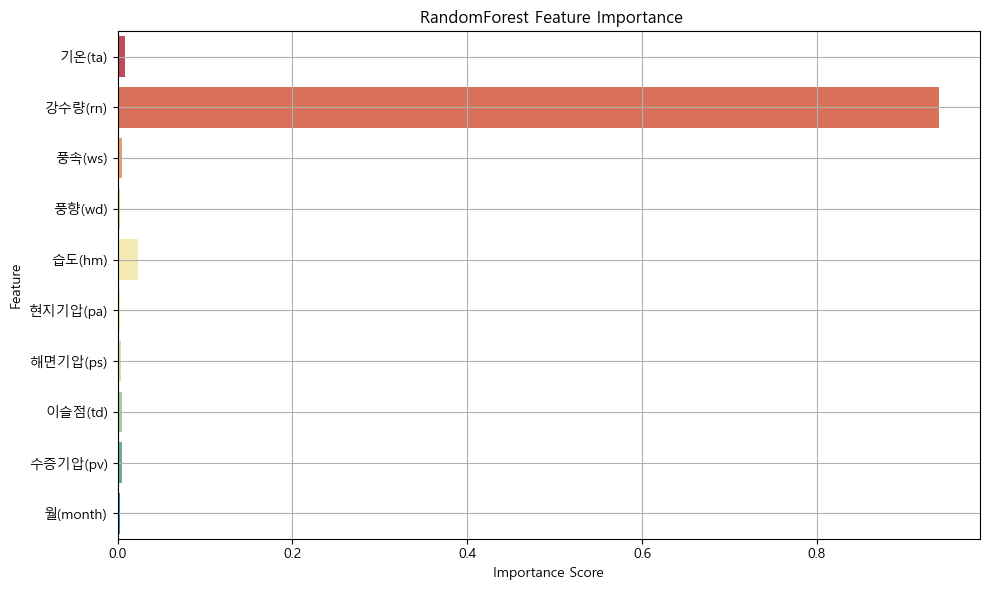

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Î≥ÄÏàò Ïù¥Î¶Ñ Îß§Ìïë (ÏàúÏÑúÎäî feature_colsÏôÄ Í∞ôÏïÑÏïº Ìï®)
feature_labels = [
    'Í∏∞Ïò®(ta)', 'Í∞ïÏàòÎüâ(rn)', 'ÌíçÏÜç(ws)', 'ÌíçÌñ•(wd)', 'ÏäµÎèÑ(hm)',
    'ÌòÑÏßÄÍ∏∞Ïïï(pa)', 'Ìï¥Î©¥Í∏∞Ïïï(ps)', 'Ïù¥Ïä¨Ï†ê(td)', 'ÏàòÏ¶ùÍ∏∞Ïïï(pv)', 'Ïõî(month)'
]

# Ï§ëÏöîÎèÑ Ï∂îÏ∂ú
importances = model.feature_importances_

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette="Spectral")
plt.title(" RandomForest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(True)
plt.tight_layout()
plt.show()


# RandomForest 10mmÏù¥ÏÉÅ Í∏∞Ï§Ä Î™®Îç∏ Ï†ÄÏû•ÌïòÍ∏∞
# ÎπÑÎßåÏò§Î©¥ Ïπ®ÏàòÏòàÏÉÅÌïòÎäî Îã®Ïàú Î™®Îç∏Ïù¥Îùº Îã§Î•∏ Î∞©Ïïà ÌïÑÏöî

In [18]:
import joblib
joblib.dump(model, 'random_forest_flood_model.pkl')  # Ï†ÄÏû•
model = joblib.load('random_forest_flood_model.pkl') # Î∂àÎü¨Ïò§Í∏∞

# RandomForest 100,200,300,400,500 ÏÑ±Îä•ÎπÑÍµê

In [4]:
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv('asos_seoul_hourly_labeled.csv')

# ÎÇ†ÏßúÏóêÏÑú Ïõî(month) Ï∂îÏ∂ú
df['tm'] = pd.to_datetime(df['tm'])  # Î¨∏ÏûêÏó¥ ‚Üí datetime Î≥ÄÌôò
df['month'] = df['tm'].dt.month     # ÏõîÎßå Ï∂îÏ∂úÌï¥ÏÑú ÏÉàÎ°úÏö¥ Ïª¨Îüº Ï∂îÍ∞Ä

# ÌäπÏÑ±Í≥º ÎùºÎ≤® Î∂ÑÎ¶¨
feature_cols = ['ta', 'rn', 'ws', 'wd', 'hm', 'pa', 'ps', 'td', 'pv', 'month']
X = df[feature_cols]
y = df['flood_risk']

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Ïã§ÌóòÌï† n_estimators Í∞í
estimator_list = [10, 50, 100, 200, 300, 500]

# Í≤∞Í≥º Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏
results = []

# Ïã§Ìóò Î∞òÎ≥µ
for n in estimator_list:
    print(f"\n Training with n_estimators = {n}")
    start = time.time()
    
    model = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    
    end = time.time()
    elapsed = round(end - start, 2)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    results.append({
        'n_estimators': n,
        'accuracy': acc,
        'f1_score': f1,
        'roc_auc': auc,
        'train_time_sec': elapsed
    })

# Í≤∞Í≥º DataFrameÏúºÎ°ú Î≥ÄÌôò
results_df = pd.DataFrame(results)
print("\n Ïã§Ìóò Í≤∞Í≥º ÏöîÏïΩ:")
print(results_df)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12,6))
plt.plot(results_df['n_estimators'], results_df['accuracy'], label='Accuracy', marker='o')
plt.plot(results_df['n_estimators'], results_df['f1_score'], label='F1 Score', marker='o')
plt.plot(results_df['n_estimators'], results_df['roc_auc'], label='ROC AUC', marker='o')
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.title('RandomForest ÏÑ±Îä• ÎπÑÍµê')
plt.legend()
plt.grid(True)
plt.show()


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

# 2. Ïã§Ï†ú Ïπ®Ïàò ÏÇ¨Î°Ä 2022ÎÖÑ~ÏßÄÍ∏àÍπåÏßÄ 9Í±¥ Îç∞Ïù¥ÌÑ∞Î•º ÎÑ£Í≥† Î™®Îç∏ÌïôÏäµ

# smote Ï≤òÎ¶¨Î•º ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò

In [5]:
pip install imbalanced-learn

  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached scikit_learn-1.7.0-cp310-cp310-win_amd64.whl.metadata (14 kB)
  Using cached sklearn_compat-0.1.3-py3-none-any.whl.metadata (18 kB)
  Using cached scikit_learn-1.6.1-cp310-cp310-win_amd64.whl.metadata (15 kB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
Using cached sklearn_compat-0.1.3-py3-none-any.whl (18 kB)
Using cached scikit_learn-1.6.1-cp310-cp310-win_amd64.whl (11.1 MB)

  Attempting uninstall: scikit-learn

    Found existing installation: scikit-learn 1.2.1

   ---------------------------------------- 0/3 [scikit-learn]
    Uninstalling scikit-learn-1.2.1:
   ---------------------------------------- 0/3 [scikit-learn]
      Successfully uninstalled scikit-learn-1.2.1
   ---------------------------------------- 0/3 [scikit-learn]
   ---------------------------------------- 0/3 [scikit-learn]
   ---------------------------------------- 0/3 [scikit-learn]
   ---------------

  You can safely remove it manually.


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv("asos_seoul_hourly_with_flood_risk.csv")

# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
df['rn'] = df['rn'].fillna(0)
numeric_cols = ['ta', 'ws', 'wd', 'hm', 'pa', 'ps', 'td', 'pv']
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Ïõî(month) Î≥ÄÏàò ÏÉùÏÑ±
df['tm'] = pd.to_datetime(df['tm'])
df['month'] = df['tm'].dt.month

# ÌäπÏÑ± Î∞è ÌÉÄÍ≤ü Î∂ÑÎ¶¨
features = ['ta', 'rn', 'ws', 'wd', 'hm', 'pa', 'ps', 'td', 'pv', 'month']
X = df[features]
y = df['flood_risk']

# ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Î™®Îç∏ ÌïôÏäµ
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = model.predict(X_test)
proba = model.predict_proba(X_test)
y_proba = proba[:, 1] if proba.shape[1] > 1 else proba[:, 0]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


[[43549     2]
 [   40     3]]
              precision    recall  f1-score   support

           0     0.9991    1.0000    0.9995     43551
           1     0.6000    0.0698    0.1250        43

    accuracy                         0.9990     43594
   macro avg     0.7995    0.5349    0.5623     43594
weighted avg     0.9987    0.9990    0.9987     43594

ROC AUC Score: 0.9508328380572789


# ÏúÑÏóêÍªÄ ÏùòÎØ∏ÏóÜÎäî Î™®Îç∏ÎßÅ ( Ïù¥Ïú† : ÌÖåÏä§Ìä∏ÏÖãÏù¥ Ï†ÑÎ∂Ä 0Îßå Ïû°Ìûò )

# SMOTE (testÏÖãÏóê 1ÏùÑ Ï∂îÍ∞ÄÌïòÎäî ÏûëÏóÖ ÌõÑ Î™®Îç∏ÎßÅÌïòÍ∏∞)

In [5]:
pip install pandas==2.1.1

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎî© Î∞è Ï†ÑÏ≤òÎ¶¨
df = pd.read_csv("asos_seoul_hourly_with_flood_risk.csv")

# 2. Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
df['rn'] = df['rn'].fillna(0)
numeric_cols = ['ta', 'ws', 'wd', 'hm', 'pa', 'ps', 'td', 'pv']
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# 3. Ïõî(month) ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ±
df['tm'] = pd.to_datetime(df['tm'])
df['month'] = df['tm'].dt.month

# 4. ÏûÖÎ†•/Ï∂úÎ†• Î≥ÄÏàò ÏÑ§Ï†ï
features = ['ta', 'rn', 'ws', 'wd', 'hm', 'pa', 'ps', 'td', 'pv', 'month']
X_full = df[features]
y_full = df['flood_risk']

# 5. ÌÅ¥ÎûòÏä§ ÎπÑÏú® ÌôïÏù∏
print(" Ï†ÑÏ≤¥ ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨:\n", y_full.value_counts())

# 6. flood_risk=1 ÎÑàÎ¨¥ Ï†ÅÏúºÎ©¥ balanced Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
positive = df[df['flood_risk'] == 1]
negative = df[df['flood_risk'] == 0]
negative_sample = negative.sample(n=len(positive) * 10, random_state=42)  # ÌÅ¥ÎûòÏä§ Í∑†Ìòï ÎßûÏ∂îÍ∏∞
df_balanced = pd.concat([positive, negative_sample])

X = df_balanced[features]
y = df_balanced['flood_risk']

# 7. train/test Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 8. SMOTE Ï†ÅÏö©
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 9. Î™®Îç∏ ÌïôÏäµ
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# 10. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = model.predict(X_test)
proba = model.predict_proba(X_test)
y_proba = proba[:, 1] if proba.shape[1] > 1 else proba[:, 0]

print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print("\n ROC AUC Score:", roc_auc_score(y_test, y_proba))


 Ï†ÑÏ≤¥ ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨:
 0    217751
1       216
Name: flood_risk, dtype: int64
 Confusion Matrix:
 [[621  27]
 [  2  63]]

 Classification Report:
               precision    recall  f1-score   support

           0     0.9968    0.9583    0.9772       648
           1     0.7000    0.9692    0.8129        65

    accuracy                         0.9593       713
   macro avg     0.8484    0.9638    0.8950       713
weighted avg     0.9697    0.9593    0.9622       713


 ROC AUC Score: 0.9905982905982906


```
Confusion Matrix:
[[TN=621, FP=27],
 [FN=2,  TP=63]]
FN=2 ‚Üí ÎÜìÏπú Ïπ®Ïàò 2Í±¥ (Í±∞Ïùò ÏóÜÏùå)
FP=27 ‚Üí ÎπÑÏπ®ÏàòÏù∏Îç∞ Ïπ®ÏàòÎ°ú ÏûòÎ™ª ÏòàÏ∏°Ìïú Í≤ΩÏö∞ ‚Üí Î™®Îç∏Ïù¥ ÎØºÍ∞êÌïòÍ≤å Î∞òÏùëÌïú ÎìØ

Î™®Îç∏ ÏÑ±Îä• ÏöîÏïΩ
ÏßÄÌëú	ÏÑ§Î™Ö
Accuracy	0.96 Ïù¥ÏÉÅ ‚Äî Ï†ÑÏ≤¥ ÏòàÏ∏° Ï†ïÌôïÎèÑ ÎÜíÏùå
Precision (1)	0.70 ‚Äî Ïπ®Ïàò ÏòàÏ∏° Ïãú Ïã§Ï†ú Ïπ®ÏàòÏùº ÌôïÎ•†
Recall (1)	0.97 ‚Äî Ïã§Ï†ú Ïπ®ÏàòÏùºÏùÑ Í±∞Ïùò Îã§ ÎßûÏ∂§ (Í±∞Ïùò ÎÜìÏπòÏßÄ ÏïäÏùå!)
F1-score (1)	0.81 ‚Äî precisionÍ≥º recallÏùò Í∑†Ìòï Ï¢ãÏùå
ROC AUC	0.99 ‚Äî Î™®Îç∏ Î∂ÑÎ•ò ÏÑ±Îä• ÏµúÍ≥† ÏàòÏ§Ä
```

# ÏãúÍ∞ÅÌôîÌïòÍ∏∞

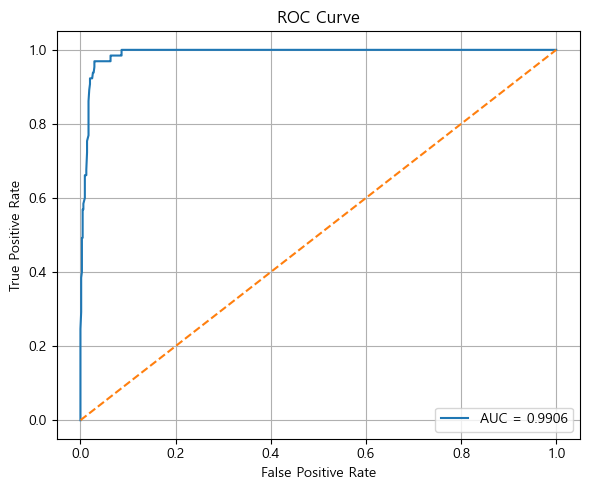

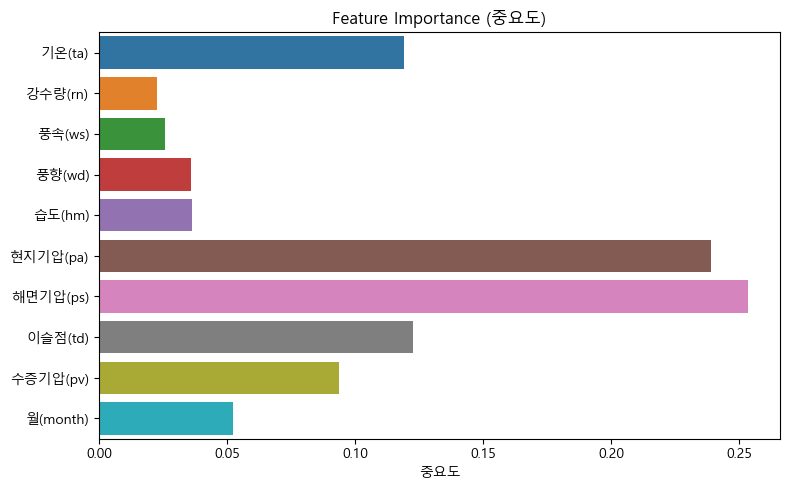

In [5]:
from sklearn.metrics import roc_curve
import seaborn as sns

# 9. ROC Curve ÏãúÍ∞ÅÌôî
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# 10. Feature Importance ÏãúÍ∞ÅÌôî
importances = model.feature_importances_
feature_labels = [
    'Í∏∞Ïò®(ta)', 'Í∞ïÏàòÎüâ(rn)', 'ÌíçÏÜç(ws)', 'ÌíçÌñ•(wd)', 'ÏäµÎèÑ(hm)',
    'ÌòÑÏßÄÍ∏∞Ïïï(pa)', 'Ìï¥Î©¥Í∏∞Ïïï(ps)', 'Ïù¥Ïä¨Ï†ê(td)', 'ÏàòÏ¶ùÍ∏∞Ïïï(pv)', 'Ïõî(month)'
]

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_labels)
plt.title("Feature Importance (Ï§ëÏöîÎèÑ)")
plt.xlabel("Ï§ëÏöîÎèÑ")
plt.tight_layout()
plt.show()

# Î™®Îç∏ Ï†ÄÏû• Î∞è Î°úÎìúÌïòÍ∏∞ 

In [15]:
import joblib

# Î™®Îç∏ Ï†ÄÏû•
joblib.dump(model, 'random_forest_flood_model.pkl')
print(" Î™®Îç∏Ïù¥ 'random_forest_flood_model.pkl'Î°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

 Î™®Îç∏Ïù¥ 'random_forest_flood_model.pkl'Î°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


In [16]:
# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
loaded_model = joblib.load('random_forest_flood_model.pkl')

# ÏòàÏ∏° ÌÖåÏä§Ìä∏
y_pred_loaded = loaded_model.predict(X_test)
print(" Î∂àÎü¨Ïò® Î™®Îç∏Î°ú ÏòàÏ∏° ÏôÑÎ£å:", y_pred_loaded[:5])


 Î∂àÎü¨Ïò® Î™®Îç∏Î°ú ÏòàÏ∏° ÏôÑÎ£å: [0 0 0 0 0]


In [ ]:
'''
 Feature Importance ÏãúÍ∞ÅÌôî

 Confusion Matrix + Precision/Recall ÏãúÍ∞ÅÌôî

 Flask APIÎ°ú Ïó∞Í≤∞
'''